In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold
import mord as m
import pandas as pd

In [5]:
load_path = 'D:\EECE499\Features\\'
#load_path = '..\..\\'

In [6]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [7]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

# Arousal

In [8]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [11]:
classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [14]:
confusion_mtrx

array([[ 0,  0,  0,  1,  0,  1,  0],
       [ 0,  0,  2,  1,  8,  0,  0],
       [ 0,  0,  1,  3, 16,  0,  0],
       [ 0,  0,  2, 13, 28,  3,  0],
       [ 0,  0,  0, 17, 54,  3,  0],
       [ 0,  0,  0,  7, 30,  5,  2],
       [ 0,  0,  0,  0,  9,  5,  2]], dtype=int64)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [16]:
print(accuracy, mae, rmse)

0.352112676056338 0.92018779342723 1.6056338028169015


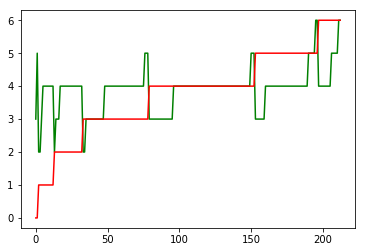

In [17]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

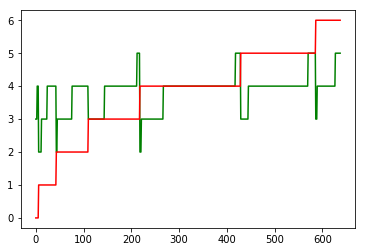

In [18]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 fea

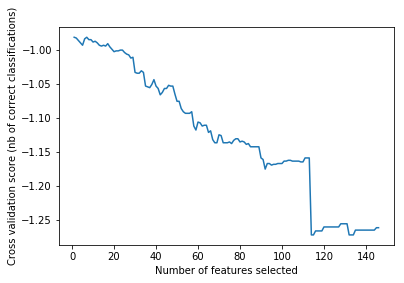

In [19]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [20]:
X_new.shape

(851, 1)

In [21]:
rfecv.ranking_

array([136, 137,  84,  10,   9,  19, 134,   2,  71, 146, 123, 135,   1,
        46,  44,  25,  76,  45,  26,  92,  79,  73,  89,  61,  99,  62,
        80,   8,  20,  66, 129,  36, 124, 143, 108, 109,  32,  21,  14,
        24,  68, 133,  37, 125, 140, 107, 103,  41,  18,  54,  22,  55,
       132,  39, 122, 145, 105, 110,  58,  12,  50,  17,  65, 131,  40,
       121, 144, 104, 112,  38,  11,  23,  28,  63, 130,  43, 119, 139,
       101, 115,  34,   4,  29,  15,  52, 128,  49, 111, 138, 102, 114,
        51,   5,  35,  27,  64, 126,  42, 120, 141,  98, 116,  56,  16,
        33,  30,  67, 127,  47, 117, 142, 100, 118,  53,   3,  74,  83,
        82,  48,  81,  95,  97, 106,  96,  31,  13,  57, 113,  94,  85,
         7,   6,  86,  70,  87,  72,  88,  75,  69,  90,  93,  91,  59,
        60,  77,  78])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [25]:
print(accuracy, mae, rmse)

0.3615023474178404 0.9342723004694836 1.6854460093896713


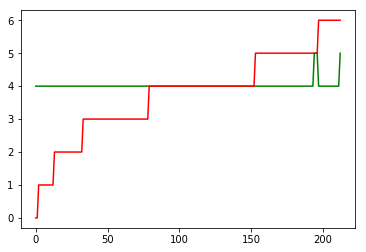

In [26]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Engaging

In [27]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -4].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [30]:
classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [33]:
confusion_mtrx

array([[ 0,  0,  0, 19,  2,  0,  0],
       [ 0,  0,  0, 18,  3,  0,  0],
       [ 0,  0,  0, 32, 11,  0,  0],
       [ 0,  0,  0, 27,  7,  1,  0],
       [ 0,  0,  0, 24, 10,  0,  0],
       [ 0,  0,  0, 31,  6,  1,  0],
       [ 0,  0,  0, 10,  8,  3,  0]], dtype=int64)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [35]:
print(accuracy, mae, rmse)

0.1784037558685446 1.4741784037558685 3.136150234741784


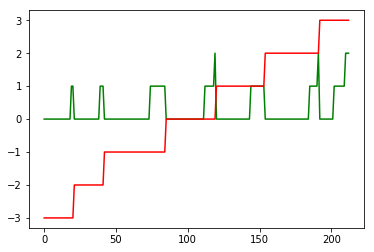

In [36]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

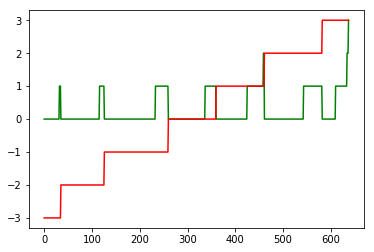

In [37]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 featu

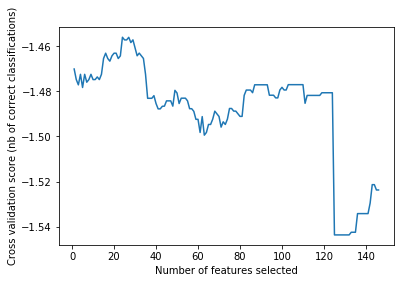

In [38]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [39]:
X_new.shape

(851, 24)

In [40]:
rfecv.ranking_

array([119, 122,   1,   1,   1,  16, 120,   9,  39, 123, 114, 121,   2,
        29,  42,  21,  23,  28,  22,  45,  71,  44,  31,  36,  32, 118,
        59,  55,  12,  56,  99,  73, 117,  97,  38,  94,   1,   1,  61,
         3,  48, 100,  80, 116,  89,  70,  85,   1,   1,  60,   5,  58,
       103,  75,  92,  95,  66,  82,   1,   1,   1,   6,  49, 104,  76,
        98, 115,  62,  87,   1,   1,   7,  10,  52, 101,  78, 110, 107,
        65,  91,   1,   1,  30,   4,  53, 105,  74, 108, 111,  47,  86,
         1,   1,  46,   8,  51, 102,  79, 113, 109,  57,  90,   1,   1,
        63,  11,  54, 106,  77,  96, 112,  72,  93,   1,  13,   1,  68,
        20,  35,   1,  50,  88,  69,  19,  17,  18,   1,  64,  83,  33,
         1,   1,  15,  37,  26,  27,  14,  34,  24,  84,  25,  43,  81,
        41,  67,  40])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [44]:
print(accuracy, mae, rmse)

0.1596244131455399 1.4694835680751173 3.056338028169014


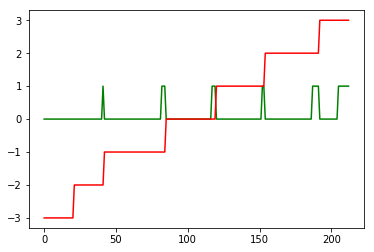

In [45]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Familiarity

In [46]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -3].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [48]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [49]:
classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [52]:
confusion_mtrx

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  8,  4,  0],
       [ 0,  0,  0,  0, 39, 30,  0],
       [ 0,  0,  0,  1, 16, 66,  3],
       [ 1,  0,  0,  1, 11, 25,  2]], dtype=int64)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [54]:
print(accuracy, mae, rmse)

0.5023474178403756 0.6572769953051644 1.136150234741784


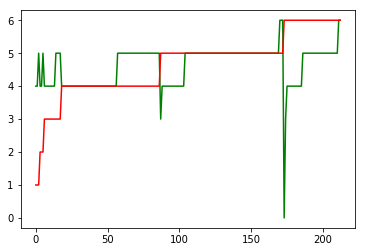

In [55]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

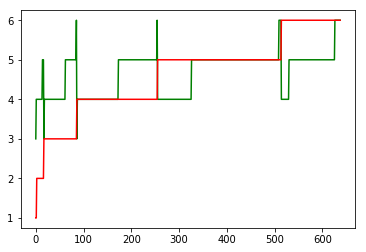

In [56]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 fe

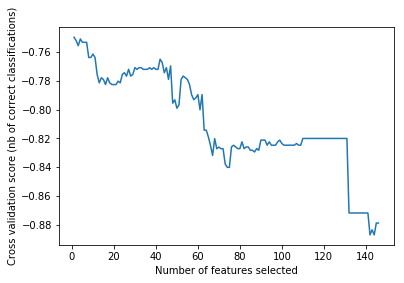

In [57]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [58]:
X_new.shape

(851, 1)

In [59]:
rfecv.ranking_

array([127, 143,  37,   4,   3,  36, 142,   5,  97, 146, 144, 145,   1,
         9,  93,  47,  67,   8,  46,  69, 100,  78,  71,  73,  70,  91,
        81,  72,  56,  42, 134,  10, 112, 110, 141, 111,   6,  31,  57,
        51,  34, 133,   7, 117, 123, 119,  94,  20,  50,  54,  60,  40,
       138,  14, 125, 115, 126, 107,  44,  39,  12,  58,  25, 132,  13,
       106, 104, 140, 101,  41,  48,  49,  61,  22, 131,  19, 120, 116,
       128, 108,  38,  43,  33,  53,  21, 136,  17, 122, 121, 130, 102,
        32,  52,  62,  63,  23, 135,  15, 124, 118, 139, 105,  16,  45,
        66,  55,  35, 137,  18, 114, 113, 129, 109,  24,   2,  68,  98,
        30,  82,  27,  99,  90,  96,  29,  11,  26,  89, 103,  88,  85,
        28,  59,  80,  64,  76,  86,  84,  65,  77,  83,  75,  79,  87,
        74,  95,  92])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [63]:
print(accuracy, mae, rmse)

0.40375586854460094 0.7230046948356808 1.0892018779342723


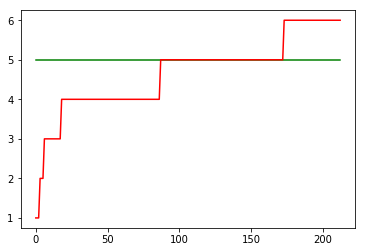

In [64]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Liking

In [65]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -2].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [67]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [68]:
classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
y_pred = classifier.predict(X_test)

In [70]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [71]:
confusion_mtrx

array([[ 0,  0,  0,  6,  3,  0,  0],
       [ 0,  0,  0,  9,  9,  0,  0],
       [ 0,  0,  0, 20, 16,  0,  0],
       [ 0,  0,  1, 14, 24,  2,  0],
       [ 0,  0,  2, 12, 15,  3,  0],
       [ 0,  0,  4, 15, 30,  2,  0],
       [ 0,  0,  1,  4, 13,  7,  1]], dtype=int64)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [73]:
print(accuracy, mae, rmse)

0.15023474178403756 1.3896713615023475 2.7981220657276995


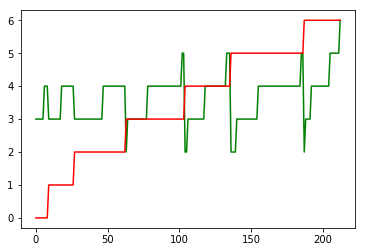

In [74]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

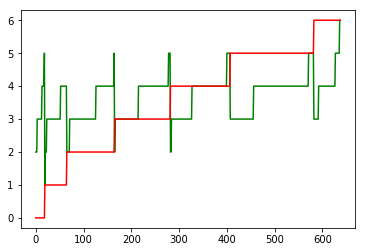

In [75]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Optimal number of features : 1


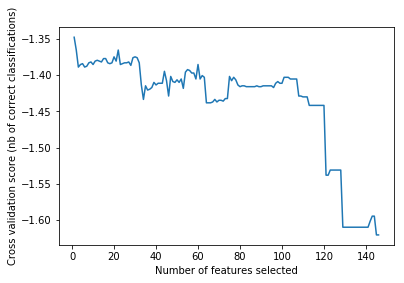

In [76]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [77]:
X_new.shape

(851, 1)

In [78]:
rfecv.ranking_

array([133, 145,  63,  12,  11,  43, 139,  42,  71, 146, 131, 140,  40,
        45,  84,  74,  75,  44,  73,  65,  64,  82,  76,  69,  68,  80,
        93,  70,  19,  55, 123,  33, 112, 142,  79, 103,  10,  20,  34,
         6,  49, 124,  32, 119, 134, 105, 111,  21,  14,  48,  13,  51,
       129,  28, 135, 132, 101, 110,  15,  23,  81,  22,  47, 125,  36,
       136, 144, 104, 114,   8,  25,  83,   1,  50, 128,  31, 120, 143,
       102, 116,  26,   9,  88,   4,  56, 127,  38, 138, 141,  91, 118,
        27,   7,  85,   5,  46, 122,  35, 117, 130, 100, 113,  24,  17,
        90,   2,  52, 126,  39, 121, 137,  95, 115,  18,  41,  30,  94,
        59,  87,  29,  99,  97, 109,  54,   3,  53,  37,  96, 108,  78,
       107,  16,  58,  60,  72,  62,  57,  61,  98,  86,  66,  77,  92,
        67,  89, 106])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
y_pred = classifier.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [82]:
print(accuracy, mae, rmse)

0.14553990610328638 1.408450704225352 2.8732394366197185


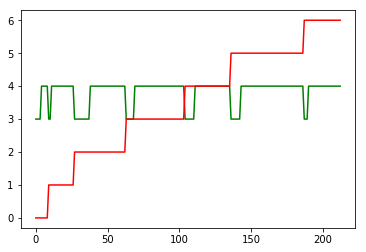

In [83]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Valence

In [84]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -1].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [86]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [87]:
classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
y_pred = classifier.predict(X_test)

In [89]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [90]:
confusion_mtrx

array([[10, 62, 27,  0,  0],
       [ 2, 25,  8,  0,  0],
       [ 3,  9,  8,  2,  0],
       [ 0, 13, 10,  6,  0],
       [ 2, 11, 13,  2,  0]], dtype=int64)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [92]:
print(accuracy, mae, rmse)

0.2300469483568075 1.164319248826291 2.112676056338028


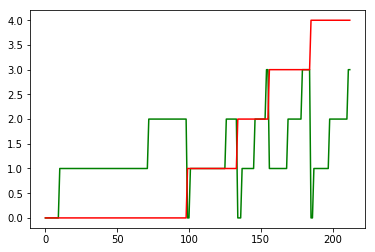

In [93]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

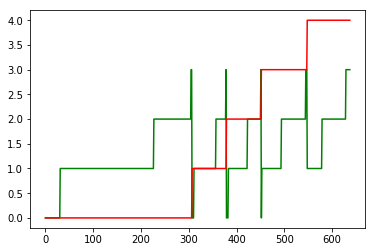

In [94]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
F

Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 fe

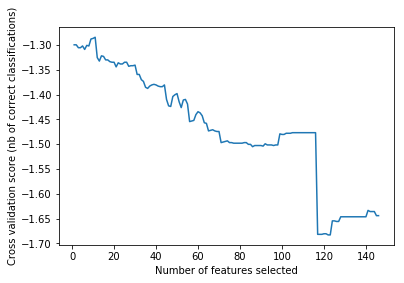

In [95]:
classifier = m.OrdinalRidge()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [96]:
X_new.shape

(851, 11)

In [97]:
rfecv.ranking_

array([116, 135,   1,  29,  30,  98, 134,  23,  55, 136, 108, 129,   6,
        34,  64,  50,  48,  33,  49,  91,  67,  68,  56,  32,  31,  63,
        59,  72,   2,   8, 119,  18, 117,  97,  58, 128,  44,  40,  62,
        11,   7, 122,  22, 111,  99,  93, 127,  37,  36,  60,   4,   9,
       121,  16, 110, 100,  79, 130,  35,  38,  73,   1,   3, 124,  19,
       109, 101,  90, 133,  20,  46,  77,   1,   1, 126,  15, 114, 104,
        66, 107,  25,  42,  26,   1,   1, 120,  12, 113, 103,  74, 118,
        39,  47,  57,   1,   5, 125,  14, 115, 106,  92, 132,  43,  45,
        75,   1,   1, 123,  21, 112, 105,  84, 131,  41,  10,   1,  80,
        69,  13,  51,  96,  86,  88,  85,  24,   1,  27,  87, 102,  76,
        28,  17,  78,  53,  65,  52,  54,  82,  61,  81,  89,  94,  95,
        83,  71,  70])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


classifier = m.OrdinalRidge()
classifier.fit(X_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [99]:
y_pred = classifier.predict(X_test)

In [100]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [101]:
print(accuracy, mae, rmse)

0.18779342723004694 1.2065727699530517 2.1737089201877935


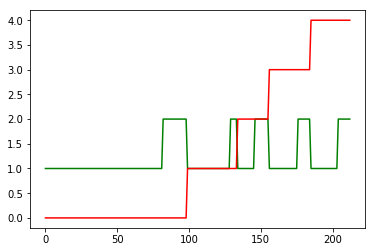

In [102]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')